# Многослойный перспетрон

## 1. Архитектура

![](nn_architecture/multilayer.png)

## 2. Загрузка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


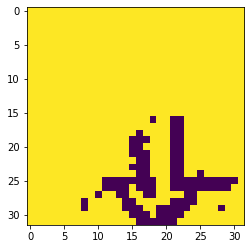

In [2]:
X = np.loadtxt('features.data').astype(np.uint8)
y = np.loadtxt('target.data').astype(np.uint8)

plt.imshow(X[10].reshape((32, 32)))

In [3]:
y = np_utils.to_categorical(y, 3)

In [4]:
HIDDEN_SIZE = 128

model = Sequential()
model.add(Dense(HIDDEN_SIZE, activation='relu', input_shape=(32 * 32, )))
model.add(Dense(HIDDEN_SIZE, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 148,099
Trainable params: 148,099
Non-trainable params: 0
_________________________________________________________________


In [6]:
RANDOM_STATE = 42
BATCH_SIZE = 4
EPOCHS = 120
VAL_SPLIT = 0.05

## 3. Обучение модели и оценка качества

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [8]:
history = model.fit(X_train, y_train, epochs=EPOCHS, verbose=0, batch_size=BATCH_SIZE, validation_split=VAL_SPLIT)

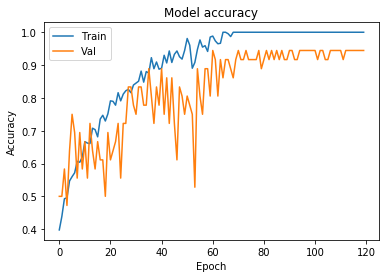

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

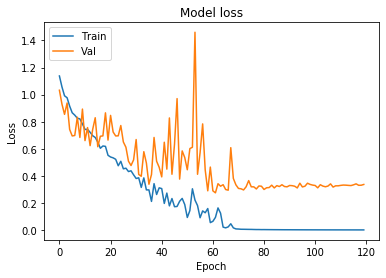

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

In [11]:
[loss, score] = model.evaluate(X_test, y_test)

180/180 [==============================] - 0s 59us/step


In [12]:
print(f"Test_score: {score}; Test_loss: {loss}")

Test_score: 0.8111110925674438; Test_loss: 1.0730732235643599


### Примечание 

Эксперимент показал, что точность на тестовой выборке сильно зависит от метода оптимизации, как ни странно SGD показал себя лучше, чем Adam, Adadelta и Adagrad. Максимальная точность с использованием Ada* была около 74%, в то время как  SGD показал точность в 82%.